# Blogging with Jupyter Notebooks

> With Notebooks, we can easily share prose, code, tables, charts, and more!

Jupyter Notebooks is a great environment for creating blog posts. Or maybe you didn't even plan to write a blog post, but you've done some interesting experiments and you realize afterwards that you have results worth sharing. Either way, you'll want some way to get your Notebook onto your blog.

[fast_template](https://www.fast.ai/2020/01/16/fast_template/) and [nbdev](http://nbdev.fast.ai/) are set up to handle Jupyter Notebooks nicely, so there's not much you have to do to get this working. I'll walk you through the steps here. Note that Jupyter Notebooks and GitHub Pages already have some support for exporting notebooks to markdown; but I suggest you use `fast_template` and `nbdev`, with the process described in this post, because otherwise you won't get useful features such as:

- Support for pasting images directly into your notebook
- Input and output cells clearly displayed with appropriate styles
- The ability to hide some cells from the markdown output.

This whole post was created using this method. You can see the source notebook here:

## Writing your notebook

Your markdown cells, code cells, and all outputs will appear in your exported blog post. The only thing that won't be shown is interactive outputs (e.g. `ipywidgets`, bokeh plots, etc), or cells you explicitly hide using the `#hide` marker discussed below.

When you write your notebook, just write whatever you want your audience to see. Since most writing platforms make it much harder to include code and outputs, many of us are in a habit of including less real examples than we should. So try to get into a new habit of including lots of examples as you write.

Often you'll want to hide boilerplate such as import statements. Add `#hide` to the top of any cell to make it not show up in output.

In [1]:
#hide
from PIL import Image

Jupyter displays the result of the last line of a cell, so there's no need to include `print()`. (And including extra code that isn't needed means there's more cognitive overhead for the reader; so don't include code that you don't really need!)

In [2]:
1+1

2

It works not just for text, but also for images:

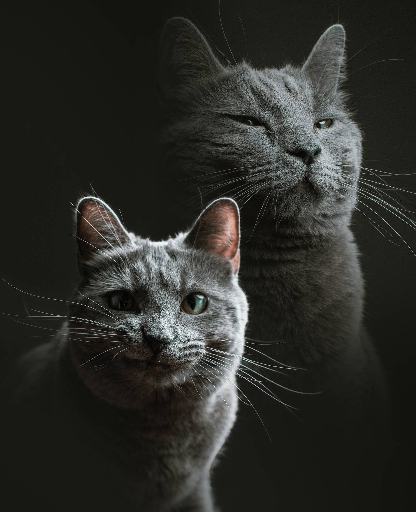

In [6]:
Image.open('images/cat_photoshoot.jpg').resize((1665//4, 2048//4))

...and plots:

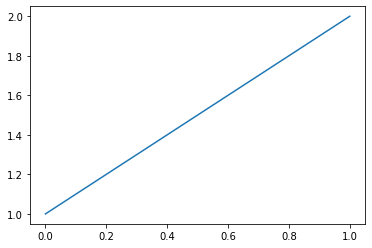

In [24]:
plt.plot([1,2]);

...and Pandas DataFrames, and much more!

In [7]:
pd.DataFrame({'a':[1,2], 'b':[3,4]})

,a,b
0,1,3
1,2,4


You can also paste images, such as screenshots, directly into a markdown cell in Jupyter. This creates a file embedded in the notebook that Jupyter calls an "attachment". Or you can use Markdown to refer to an image on the internet by its URL.

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Creative-Tail-Animal-dog.svg)

## Exporting to markdown

Before you export to markdown, you first need to make sure your notebook is saved, so press `s` or click `File`➡`Save`. Then close the browser tab with the open notebook. This is important, because when we export to markdown any attachments will be exported to files, and the notebook will be updated to refer to those external files. Therefore, the notebook itself will change; if you leave it open, you may accidentally end up overwriting the updated notebook.

You'll need `nbdev` installed; if you haven't already, then install it with:

    pip install nbdev

Then, in your terminal, cd to the folder containing your notebook, and type (assuming your notebook is called `name.ipynb`):

    nbdev_nb2md name.ipynb

You'll see that a file `name.md` and folder `name_files` have been created (where "name" is replaced by your notebook file name). One problem is that the markdown exporter assumes your images will be in `name_files`, but on your blog they'll be in `/images/name_files`. So we need to do a search and replace to fix this in the markdown file. We can do this automatically with python. Create a file called `upd_md.py` with the following contents:

```python
import fileinput,re
for f in fileinput.input(inplace=True):
    print(re.sub(r'^(!.*]\()(\w+_files/)', r'\1/images/\2', f), end='')
```

Then, in the terminal, run (assuming that `upd_md.py` and your markdown doc are in the same folder):

    python upd_md.py name.md

This will modify your markdown doc inplace, so it will have the correct `/images/` prefix on each image reference.

Finally, copy `name_files` to the `images` folder in your blog repo, and `name.md` to your `_posts` folder, and rename `name.md` to have the required `YEAR-MONTH-DAY-name.md` format. Commit and push this to GitHub, and you should see your post!